# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Perform Weather Check
weatherlist={}

for index in range(0,len(cities)):
    city=cities[index]
    print (f'processing record |{city}')
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={weather_api_key}'   

    response=requests.get(url)

    if response.status_code==200:

        weather_data=response.json()

        city_weather=[
            city,
            weather_data['clouds']['all'],
            weather_data['sys']['country'],
            weather_data['dt'],
            weather_data['main']['humidity'],
            weather_data['coord']['lat'],
            weather_data['coord']['lon'],
            weather_data['main']['temp_max'],
            weather_data['wind']['speed']
        ]
        
        weatherlist[index]=city_weather
    else:
        print('city not found. skipping')
print('------------------------------------------------------------')
print('data retrieval complete')
print('------------------------------------------------------------')

processing record |belushya guba
city not found. skipping
processing record |bengkulu
processing record |mar del plata
processing record |ponta do sol
processing record |illoqqortoormiut
city not found. skipping
processing record |dahuk
processing record |murgab
processing record |tasiilaq
processing record |rikitea
processing record |tromso
processing record |ushuaia
processing record |punta arenas
processing record |guapore
processing record |georgetown
processing record |dingle
processing record |sentyabrskiy
city not found. skipping
processing record |mataura
processing record |barrow
processing record |klaksvik
processing record |srikakulam
processing record |ayan
processing record |hilo
processing record |tiksi
processing record |amderma
city not found. skipping
processing record |haines junction
processing record |albany
processing record |hualmay
processing record |mys shmidta
city not found. skipping
processing record |bluff
processing record |airai
processing record |kosh-aga

processing record |kruisfontein
processing record |hihifo
city not found. skipping
processing record |placerville
processing record |amuntai
processing record |broken hill
processing record |san cristobal
processing record |helena
processing record |sangmelima
processing record |faanui
processing record |kuching
processing record |saint george
processing record |lyuban
processing record |wschowa
processing record |kupino
processing record |pisco
processing record |mao
processing record |saleaula
city not found. skipping
processing record |esperance
processing record |inderborskiy
city not found. skipping
processing record |fortuna
processing record |waslala
processing record |vlore
processing record |sao joao da barra
processing record |mirpur mathelo
processing record |grindavik
processing record |kota kinabalu
processing record |anadyr
processing record |hohhot
processing record |touros
processing record |jabiru
city not found. skipping
processing record |vostok
processing record |ki

ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?q=olafsvik&units=imperial&APPID=d7f187ce7635bc15abfb4c6c809e5608 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000198B725BB00>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Export City Data into a csv and Display the DataFrame
df=pd.DataFrame.from_dict(weatherlist,orient='index',columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
df.to_csv(output_data_file, ",",header=True,columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'],index=True,index_label='City_ID')
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,bengkulu,100,ID,1603719447,80,-3.80,102.27,77.49,5.06
2,mar del plata,0,AR,1603719603,59,-38.00,-57.56,61.00,9.17
3,ponta do sol,75,PT,1603719408,73,32.67,-17.10,69.80,12.75
5,dahuk,0,IQ,1603719604,19,36.87,42.99,72.61,4.74
6,murgab,0,TM,1603719604,38,37.50,61.97,75.20,4.70
...,...,...,...,...,...,...,...,...,...
409,nong kung si,90,TH,1603719749,94,16.65,103.30,73.40,3.36
410,chama,90,CH,1603719749,87,47.18,8.46,44.01,4.50
411,manggar,100,ID,1603719749,81,-2.88,108.27,79.84,2.17
412,westport,90,US,1603719604,81,41.14,-73.36,50.00,10.29


In [12]:
# Describe the DataFrame
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,55.289753,1.603475e+09,71.913428,18.844558,18.154664,62.032527,8.228004
std,36.786408,9.026737e+01,21.193702,33.250653,90.710036,21.751347,5.834941
min,0.000000,1.603474e+09,1.000000,-54.800000,-179.170000,-2.200000,0.360000
25%,20.000000,1.603475e+09,63.000000,-8.922500,-60.657500,47.145000,4.230000
50%,68.500000,1.603475e+09,76.000000,20.970000,22.625000,69.090000,6.930000
75%,90.000000,1.603475e+09,87.000000,46.512500,102.330000,78.750000,11.135000
max,100.000000,1.603475e+09,100.000000,78.220000,179.320000,101.660000,48.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

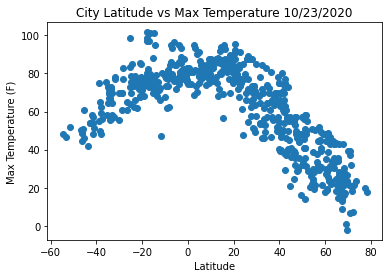

In [15]:
# Scatter Plot Lattitude vs Temperature
x=df['Lat']
y=df['Max Temp']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature 10/23/2020')
plt.show()

## Latitude vs. Humidity Plot

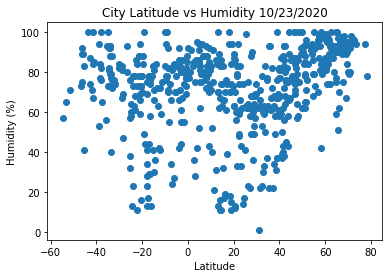

In [16]:
# Scatter Plot Lattitude vs Humidity
x=df['Lat']
y=df['Humidity']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity 10/23/2020')
plt.show()

## Latitude vs. Cloudiness Plot

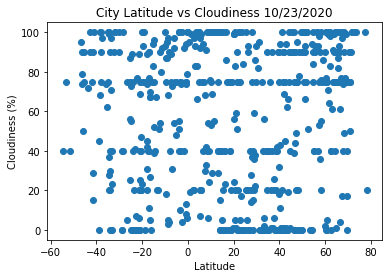

In [17]:
# Scatter Plot Lattitude vs Cloudiness
x=df['Lat']
y=df['Cloudiness']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness 10/23/2020')
plt.show()

## Latitude vs. Wind Speed Plot

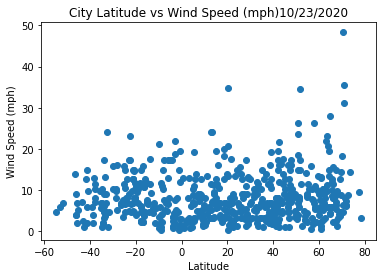

In [19]:
# Scatter Plot Lattitude vs Wind Speed
x=df['Lat']
y=df['Wind Speed']
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph)10/23/2020')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R value is  -0.868907064317159


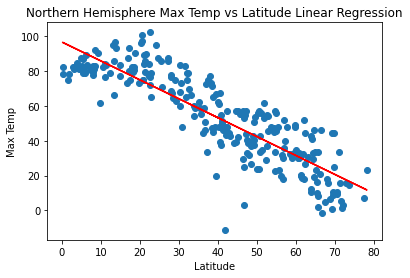

In [20]:
#Northern Hemisphere Scatter Plot with Linear Regression: Max Temp vs. Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Max Temp']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northern Hemisphere Max Temp vs Latitude Linear Regression')
plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

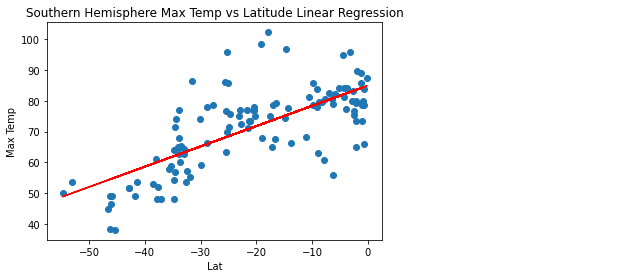

In [18]:
#Creates and saves scatterplot
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
# plt.annotate(line_eq,(0,0.4),fontsize=15,color="red")
plt.annotate(r,((0.35*df['Lat'].max()),(0.8*df['Max Temp'].max())),fontsize=12,color="red")
plt.annotate(p,((0.35*df['Lat'].max()),(0.7*df['Max Temp'].max())), fontsize=12, color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Max Temp vs Latitude Linear Regression')
plt.show()

The R value is  -0.868907064317159


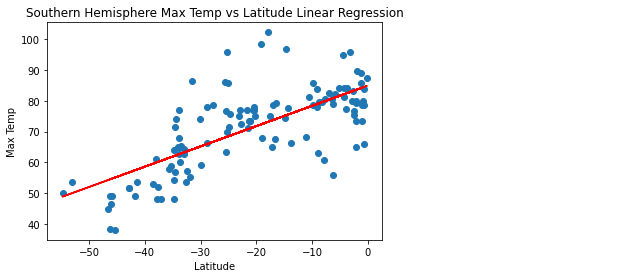

In [19]:
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(r,((0.35*df['Lat'].max()),(0.8*df['Max Temp'].max())),fontsize=12,color="red")
plt.annotate(p,((0.35*df['Lat'].max()),(0.7*df['Max Temp'].max())), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Southern Hemisphere Max Temp vs Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is  0.34817437720036254


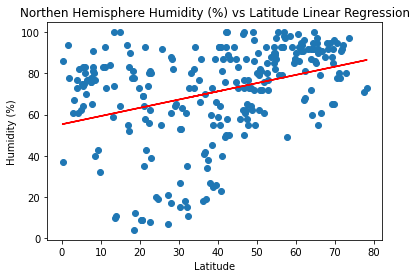

In [21]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Humidity vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Humidity']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northen Hemisphere Humidity (%) vs Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R value is  0.03378822572453119


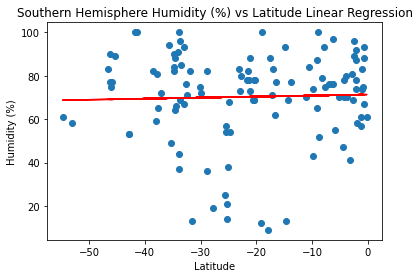

In [22]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Humidity vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Humidity']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Southern Hemisphere Humidity (%) vs Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is  0.2698250273527599


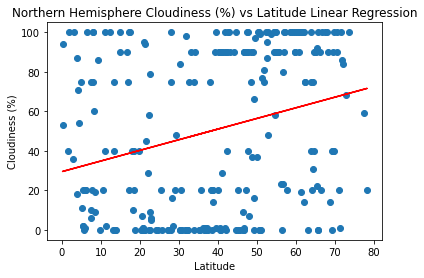

In [23]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Cloudiness(%) vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Cloudiness']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northern Hemisphere Cloudiness (%) vs Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R value is  0.09202863228049073


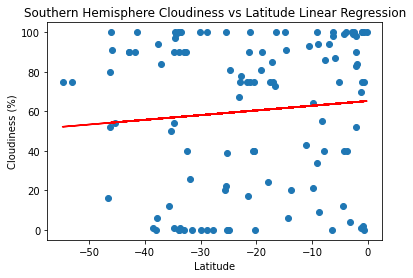

In [24]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Cloudiness(%) vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Cloudiness']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Southern Hemisphere Cloudiness vs Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is  0.1541038676225644


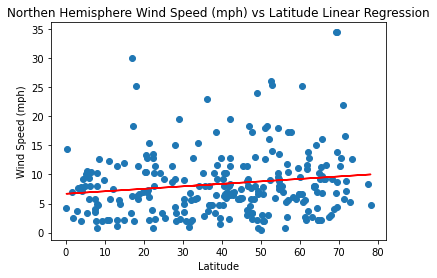

In [25]:
#Scatter Plot with Linear Regression line for the Northern Hemisphere Wind Speed vs Latitude
x= df[df['Lat']>0]['Lat']
y= df[df['Lat']>0]['Wind Speed']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Northen Hemisphere Wind Speed (mph) vs Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R value is  -0.2712284440122191


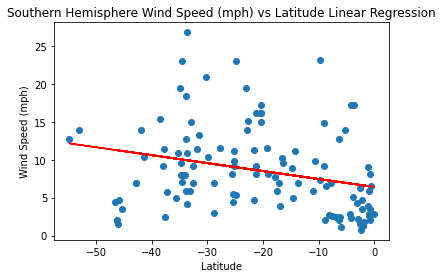

In [26]:
#Scatter Plot with Linear Regression line for the Southern Hemisphere Wind Speed vs Latitude
x= df[df['Lat']<0]['Lat']
y= df[df['Lat']<0]['Wind Speed']
slope,intercept,r_value,p_value,std_err=linregress(x,y)
print('The R value is ',r_value)
fig=plt.figure()
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Southern Hemisphere Wind Speed (mph) vs Latitude Linear Regression')
plt.show()